# Inflation Framing Analysis: Guardian, Telegraph & BBC (2022–2023)

## 1. Introduction
- Brief description of goals & hypotheses (H1, H2, H3)
- Summary of corpus (`cleaned_articles_2022_2023.csv`)

## 2. Exploratory Data Analysis (EDA)
### 2.1 Load data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import calendar
from matplotlib.ticker import MaxNLocator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import os

In [2]:
df = pd.read_csv('data/cleaned_articles_2022_2023.csv')

df.head()

,Unnamed: 0.1,Unnamed: 0,Title,URL,Article_Text,Publication Date,Source,Sentiment Score,Year,Month,Article_Length
0,0,0,Bank of England governor says don't underestim...,https://www.bbc.co.uk/news/business-67474899,Andrew Bailey told MPs that Bank policymakers ...,2023-11-21,BBC,0.249234,2023,11,3813
1,1,1,Rishi Sunak: 'We've halved inflation' and othe...,https://www.bbc.co.uk/news/uk-politics-67475281,We've been looking at some of his claims. Rish...,2023-11-20,BBC,0.150736,2023,11,1898
2,2,2,Rachel Reeves: Labour would increase benefits ...,https://www.bbc.co.uk/news/uk-politics-67466971,"But before the champagne corks pop, everyone s...",2023-11-16,BBC,0.209527,2023,11,5023
3,3,3,What a falling inflation rate means for your f...,https://www.bbc.co.uk/news/business-67426526,When inflation started to accelerate early in ...,2023-11-15,BBC,0.396906,2023,11,3650
4,4,4,Why inflation is falling but prices are still ...,https://www.bbc.co.uk/news/business-64290160,The government had committed to better protect...,2023-11-15,BBC,0.250206,2023,11,3112


# Visualization Styling for Academic Paper

This notebook uses consistent styling across all visualizations to maintain a professional, publication-quality appearance throughout the paper. This includes:

- **Color Scheme**: Each media outlet has a consistent color representation:
 - BBC: Blue (#1f77b4)
 - Telegraph: Red (#d62728)
 - Guardian: Green (#2ca02c)

- **Formatting**: Consistent annotation styles, legends, and source citations across all figures

In [3]:
# Set up standardized visualization styling for the entire notebook
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator

# Make sure visualizations directory exists
os.makedirs('visualisations', exist_ok=True)

def setup_visualization_style():
    """Set up consistent styling for all visualizations in the notebook"""
    # Use seaborn's professional whitegrid style
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Set context for paper with larger font scale
    sns.set_context("paper", font_scale=1.3)
    
    # Set global matplotlib parameters for academic paper style
    plt.rcParams['figure.figsize'] = (12, 7)
    plt.rcParams['axes.titleweight'] = 'bold'
    plt.rcParams['font.family'] = 'serif'  # Academic style
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.3
    plt.rcParams['grid.color'] = 'gray'
    plt.rcParams['grid.linestyle'] = '--'
    plt.rcParams['savefig.dpi'] = 300  # High resolution for all saved figures
    
    # Define standard color palette for sources
    source_colors = {
        'BBC': '#1f77b4',      # Blue
        'Telegraph': '#d62728', # Red
        'Guardian': '#2ca02c'   # Green
    }
    
    # Return the source colors for use in plots
    return source_colors

# Fix the save_figure function to ensure it saves to the visualisations folder
def save_figure(fig, filename_base):
    """Save figure with standard parameters for publication"""
    # Create directory if needed
    os.makedirs('visualisations', exist_ok=True)
    
    # Ensure the path includes the visualisations directory
    if not filename_base.startswith('visualisations/'):
        filename_base = f'visualisations/{filename_base}'
        
    # Save in multiple formats at high resolution
    fig.savefig(f'{filename_base}.pdf', bbox_inches='tight')
    print(f"Saved {filename_base}.pdf visualisation")

def add_source_note(fig, additional_text=""):
    """Add standardized source note to figure"""
    base_text = 'Source: UK media dataset (N=2,804), 2022-2023'
    if additional_text:
        base_text += f"; {additional_text}"
    fig.text(0.01, 0.01, base_text, fontsize=8, color='dimgray')

def format_legend(ax, title="Media Outlet"):
    """Apply standard legend formatting"""
    legend = ax.legend(title=title, frameon=True, fontsize=11,
                      framealpha=0.9, edgecolor='lightgray')
    legend.get_title().set_fontweight('bold')
    return legend

def format_axes(ax, x_label="", y_label="", title=""):
    """Apply standard axis formatting"""
    if x_label:
        ax.set_xlabel(x_label, fontsize=13, labelpad=10)
    if y_label:
        ax.set_ylabel(y_label, fontsize=13, labelpad=10)
    if title:
        ax.set_title(title, fontsize=16, pad=15)
    
    # Format date axes if x-axis contains dates
    if isinstance(ax.get_xlim()[0], float) and ax.get_xlim()[0] > 700000:  # Matplotlib date format check
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        plt.xticks(rotation=45)
    
    return ax

# Initialize the standard style and colors for the notebook
source_colors = setup_visualization_style()

print("Visualization style setup complete - all plots will use consistent academic styling")

Visualization style setup complete - all plots will use consistent academic styling


## 2. Exploratory Data Analysis (EDA)

Before diving into NLP methods, we first explore the raw corpus to understand its size, composition and basic characteristics.

### 2.1 Load & preview the data
- Read in `data/cleaned_articles_2022_2023.csv` with `pandas.read_csv`, parsing the `date` column as datetime.
- Display the first few rows to verify that columns (`id`, `date`, `source`, `title`, `text`) loaded correctly.
- Check data types and ensure no unexpected nulls in the key fields.

### 2.2 Corpus overview
- **Article counts by source**: count the number of articles from the Guardian, Telegraph and BBC.
- **Date range**: identify the earliest and latest publication dates to confirm coverage spans 2022–2023.
- **Monthly volume**: aggregate counts per source by month and plot a time series to see publication trends and any seasonality.

### 2.3 Text length & integrity checks
- **Text length distribution**: compute word counts for each article, plot a histogram to spot outliers or unusually short/long pieces.
- **Missing values**: report any nulls in `text` or `source` and decide how to handle them.
- **Duplicate IDs**: check for and drop any duplicate article entries.

> **Outcome:** A clear picture of how many articles we have per outlet, their temporal distribution, and whether any cleaning or filtering is needed before preprocessing.  


In [4]:
# count number of bbc articles
bbc_count = df[df['Source'] == 'BBC'].shape[0]
print(f"Number of BBC articles: {bbc_count}")
# count number of guardian articles
guardian_count = df[df['Source'] == 'Guardian'].shape[0]
print(f"Number of Guardian articles: {guardian_count}")
# count number of telegraph articles
telegraph_count = df[df['Source'] == 'Telegraph'].shape[0]
print(f"Number of Telegraph articles: {telegraph_count}")

Number of BBC articles: 233
Number of Guardian articles: 1576
Number of Telegraph articles: 995



==== COMBINED INFLATION AND ARTICLE COUNT VISUALIZATION ====
Saved visualisations/inflation_article_count.pdf visualisation


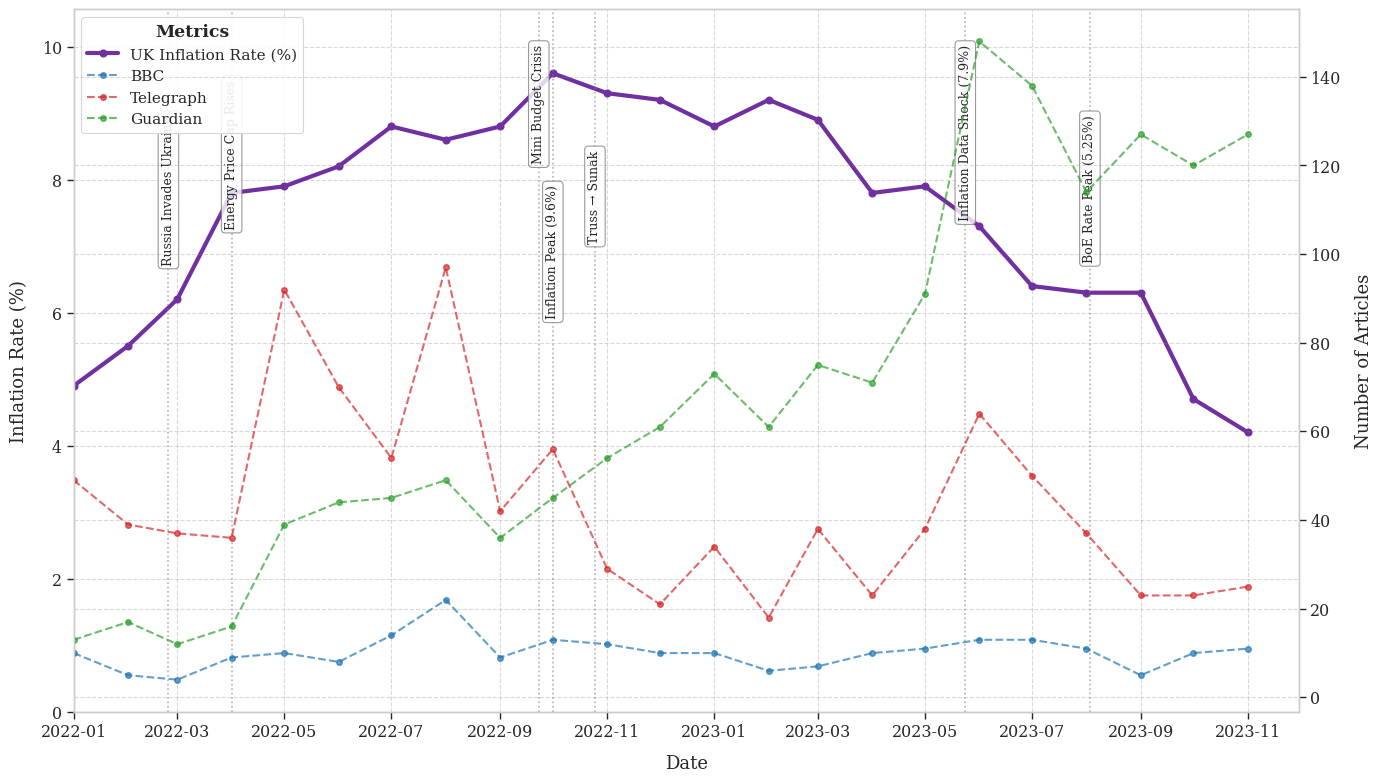

In [5]:

source_colors = setup_visualization_style()

print("\n==== COMBINED INFLATION AND ARTICLE COUNT VISUALIZATION ====")

# Process the inflation data
lines = """
2022 JAN,4.9
2022 FEB,5.5
2022 MAR,6.2
2022 APR,7.8
2022 MAY,7.9
2022 JUN,8.2
2022 JUL,8.8
2022 AUG,8.6
2022 SEP,8.8
2022 OCT,9.6
2022 NOV,9.3
2022 DEC,9.2
2023 JAN,8.8
2023 FEB,9.2
2023 MAR,8.9
2023 APR,7.8
2023 MAY,7.9
2023 JUN,7.3
2023 JUL,6.4
2023 AUG,6.3
2023 SEP,6.3
2023 OCT,4.7
2023 NOV,4.2
"""

# Parse the inflation data
data_rows = []
for line in lines.strip().split('\n'):
    if line:
        try:
            date_str, rate_str = line.split(',')
            year = int(date_str.split()[0])
            month = date_str.split()[1]
            # Convert month name to month number
            month_num = {"JAN": 1, "FEB": 2, "MAR": 3, "APR": 4, "MAY": 5, "JUN": 6,
                         "JUL": 7, "AUG": 8, "SEP": 9, "OCT": 10, "NOV": 11, "DEC": 12}[month]
            rate = float(rate_str)
            data_rows.append({'Year': year, 'Month': month_num, 'Rate': rate})
        except:
            # Skip any problematic lines
            continue

inflation_df = pd.DataFrame(data_rows)

# Create a proper date column for inflation data
inflation_df['Date'] = pd.to_datetime(inflation_df[['Year', 'Month']].assign(day=1))

# Prepare article count data
# Ensure we have monthly counts by source
if 'monthly_counts' not in locals():
    monthly_counts = df.groupby(['Year', 'Month', 'Source']).size().reset_index(name='Count')
    monthly_counts['Date'] = pd.to_datetime(monthly_counts[['Year', 'Month']].assign(day=1))
    monthly_counts = monthly_counts.sort_values('Date')

# Create a dual-axis figure
fig, ax1 = plt.subplots(figsize=(14, 8))

# Format first axis using the standard function
format_axes(ax1, 
           x_label="Date", 
           y_label="Inflation Rate (%)")

# Plot inflation data
ax1.plot(inflation_df['Date'], inflation_df['Rate'], 
         color='#7030A0', linewidth=3, marker='o', 
         label='UK Inflation Rate (%)')

# Set y-axis limits for inflation
ax1.set_ylim(bottom=0)
ax1.set_ylim(top=max(inflation_df['Rate']) * 1.1)  # Give some headroom

# Second axis: Article counts (right y-axis)
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Articles', fontsize=13, labelpad=10)

# Plot article counts by source
for source in df['Source'].unique():
    source_data = monthly_counts[monthly_counts['Source'] == source]
    # Make sure dates are in datetime format and sorted
    source_data = source_data.sort_values('Date')
    ax2.plot(source_data['Date'], source_data['Count'], 
             marker='o', markersize=4,
             linewidth=1.5, linestyle='--', label=source, 
             color=source_colors[source], alpha=0.7)

# Set date range to match (Jan 2022 - Nov 2023)
ax1.set_xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2023-11-30'))

# Add annotations for key economic events
key_events = {
    '2022-02-24': 'Russia Invades Ukraine',
    '2022-04-01': 'Energy Price Cap Rises',
    '2022-09-23': 'Mini Budget Crisis',
    '2022-10-25': 'Truss → Sunak',
    '2022-10-01': 'Inflation Peak (9.6%)',
    '2023-05-24': 'Inflation Data Shock (7.9%)',
    '2023-08-03': 'BoE Rate Peak (5.25%)'
}

# Define varying y-positions to prevent overlap
y_positions = {
    'Russia Invades Ukraine': 0.85,
    'Energy Price Cap Rises': 0.90,
    'Mini Budget Crisis': 0.95,
    'Truss → Sunak': 0.80,
    'Inflation Peak (9.6%)': 0.75,
    'Inflation Data Shock (7.9%)': 0.95,
    'BoE Rate Peak (5.25%)': 0.85
}

# Add event annotations
for date_str, label in key_events.items():
    date = pd.to_datetime(date_str)
    ax1.axvline(x=date, color='gray', linestyle=':', alpha=0.6)
    # Position label with varying heights
    y_pos = ax1.get_ylim()[1] * y_positions[label]
    ax1.annotate(label, xy=(date, y_pos), xytext=(0, 0), 
                textcoords="offset points", rotation=90, 
                fontsize=9, ha='center', va='top',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Create a custom legend with all items
combined_legend = ax1.legend(lines1 + lines2, labels1 + labels2, 
                             loc='upper left', title="Metrics", 
                             frameon=True, fontsize=11, 
                             framealpha=0.9, edgecolor='lightgray')
combined_legend.get_title().set_fontweight('bold')
# Adjust layout
plt.tight_layout()

# Save the figure using the standard function
save_figure(fig, "inflation_article_count")

Saved visualisations/avg_word_count_by_source.pdf visualisation


/var/folders/tz/m04h080x4rgdtp4hkk46mfq40000gn/T/ipykernel_38270/1427329682.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


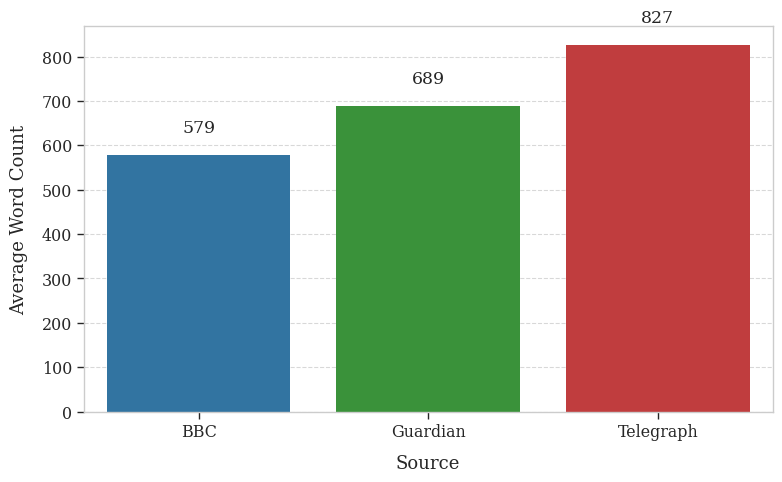

In [6]:
#------------------------------
# 3. ARTICLE LENGTH BY SOURCE
#------------------------------

# Calculate article length 
if 'Article_Length' not in df.columns:
    df['Article_Length'] = df['Article_Text'].str.len()

if 'Word_Count' not in df.columns:
    df['Word_Count'] = df['Article_Text'].apply(lambda x: len(str(x).split()))

# Calculate article length statistics by source
length_stats = df.groupby('Source').agg({
    'Article_Length': ['mean', 'median', 'min', 'max', 'count'],
    'Word_Count': ['mean', 'median', 'min', 'max']
})

# Format for readability
length_stats_formatted = pd.DataFrame({
    'Number of Articles': length_stats[('Article_Length', 'count')],
    'Average Length (chars)': length_stats[('Article_Length', 'mean')].round(0).astype(int),
    'Average Word Count': length_stats[('Word_Count', 'mean')].round(0).astype(int),
    'Median Word Count': length_stats[('Word_Count', 'median')].round(0).astype(int),
    'Min Word Count': length_stats[('Word_Count', 'min')].round(0).astype(int),
    'Max Word Count': length_stats[('Word_Count', 'max')].round(0).astype(int)
})

# Create figure with standardized styling
fig = plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=length_stats_formatted.index,
    y=length_stats_formatted['Average Word Count'],
    palette=[source_colors['BBC'], source_colors['Guardian'], source_colors['Telegraph']]
)

# Add value labels on top of bars
for i, v in enumerate(length_stats_formatted['Average Word Count']):
    ax.text(i, v + 50, str(v), ha='center')

# Format axes using your standardized function
format_axes(ax, 
           x_label="Source", 
           y_label="Average Word Count")

# Adjust layout
plt.tight_layout()

# Save using your standardized function
save_figure(fig, "avg_word_count_by_source")


==== TOP WORDS BY SOURCE VISUALIZATION ====


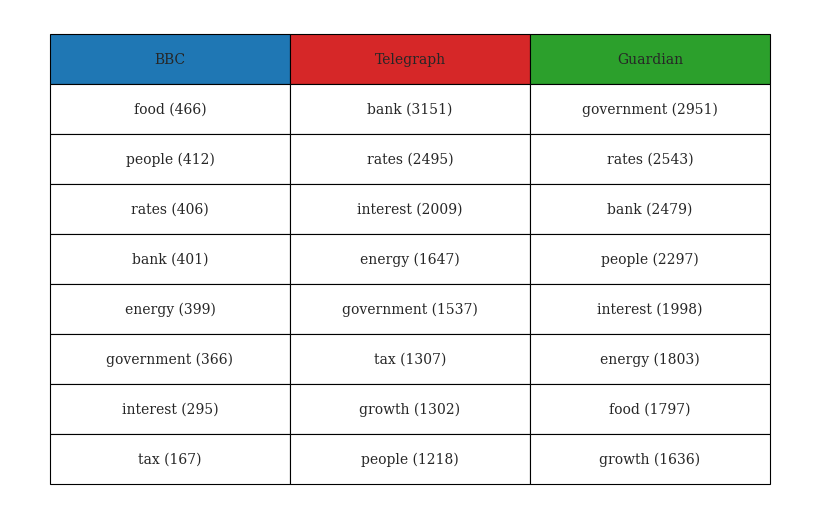

In [9]:
#------------------------------
# 4. TOP 8 WORDS BY SOURCE
#------------------------------

import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

print("\n==== TOP WORDS BY SOURCE VISUALIZATION ====")

# Define stopwords to exclude
stopwords = set([
    'the', 'and', 'to', 'of', 'a', 'in', 'for', 'is', 'on', 'that', 'by', 'this',
    'with', 'it', 'are', 'as', 'was', 'but', 'be', 'at', 'from', 'has', 'have',
    'had', 'an', 'will', 'they', 'their', 'not', 'which', 'or', 'we', 'you', 
    'one', 'all', 'would', 'there', 'been', 'if', 'more', 'when', 'who', 'what',
    'also', 'said', 'its', 'into', 'than', 'other', 'can', 'only', 'about', 'may',
    'some', 'could', 'should', 'his', 'her', 'our', 'up', 'were', 'out', 'then',
    'time', 'them', 'just', 'such', 'how', 'these', 'any', 'two', 'per', 'cent',
    'now', 'over', 'like', 'even', 'those', 'after', 'first', 'new', 'many',
    'year', 'years', 'last', 'month', 'months', 'week', 'weeks', 'day', 'days',
    'inflation', 'prices', 'high', 'low', 'rise', 'fall', 'increase', 'decrease', 
    'rate', 'cost', 'price', 'costs', 'pay', 'higher', 'while', 'she', 'since', 
    'england', 'rises', 'down', 'rising', 'economy', 'says', 'living', 'figures', 'much', 'expected', 'less', 'still'
])

# Text preprocessing function
def preprocess_for_word_count(text):
    if not isinstance(text, str):
        return []
    
    # Lowercase and remove punctuation
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    
    # Split into tokens, remove stopwords and short words
    tokens = [word for word in text.split() if word not in stopwords and len(word) > 2]
    
    return tokens

# Process text and count words by source
source_words = {}
for source in df['Source'].unique():
    # Combine all text from this source
    source_text = ' '.join(df[df['Source'] == source]['Article_Text'].fillna(''))
    
    # Process and count words
    tokens = preprocess_for_word_count(source_text)
    word_counts = Counter(tokens)
    top_words = word_counts.most_common(8)
    source_words[source] = top_words

# Create a DataFrame for the top words
top_words_df = pd.DataFrame(index=range(8), columns=df['Source'].unique())
for source, words in source_words.items():
    top_words_df[source] = [f"{word} ({count})" for word, count in words]

# Create figure with minimal dimensions - just enough for the table
fig = plt.figure(figsize=(8, 5))  # Reduced height significantly
ax = plt.subplot(111)
ax.axis('off')

# Set figure background to transparent
fig.patch.set_alpha(0.0)

# Use the standard source colors for column headers
col_colors = [source_colors.get(source, '#EEEEEE') for source in top_words_df.columns]

# Create table with the data - adjust the table to fill most of the space
table = ax.table(
    cellText=top_words_df.values,
    colLabels=top_words_df.columns,
    cellLoc='center',
    loc='center',
    colColours=col_colors,
    bbox=[0.05, 0.05, 0.9, 0.9]  # Table fills 90% of the figure area
)

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)  # Slightly smaller font to fit better
table.scale(1, 1.2)  # Slightly reduced row height for less vertical space

# Eliminated title and other elements that add space

# Set extremely tight layout with minimal padding
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # No margins at all

# Save the figure with minimal padding and tight bounding box
plt.savefig("visualisations/top_words_by_source.pdf", 
           bbox_inches='tight', 
           pad_inches=0.05,  # Minimal padding
           transparent=True)  # Transparent background